## Verwendung von Jupyter Lab

Dieses `Juypter Notebook` ist ein Beispiel zur Anrwendung von `Stata` innerhalb der Jupyter Umgebung unter der Verwendung des `stata_kernel`.

Für eine detaillierte Dokumentation - inklusive Installationsanleitung - siehe https://kylebarron.dev/stata_kernel/.

## Einleitung

Jupyter Notebook ist ein File-format, das interaktives codieren von text, code und Ergebnissen in einem Dokument erlaubt. Erstellte Files (mit der Endung `.ipynb`) können geteilt werden. Verfügen andere Personen ebenfalls über eine Installation von Jupyter, dann sind nicht nur die Ergebnisse sichtbar, ohne dass der Code ausgeführt wird, sondern der Code innerhalb des Dokuments kann erneut ausgeführt und bearbeitet werden.

Jupyter selbst ist sprachunabhängig, d.h. es erlaubt das Schreiben von Code in jeder Sprache. Diese Dokument basier auf einer Vorlage von Kyle Baron und verwendet Code der Statistik-Software Stata, aber Jupyter kann auch mit den Code anderer Sprachen wie [Python](https://www.python.org/), [R](https://irkernel.github.io/), [Julia](https://github.com/JuliaLang/IJulia.jl), [Matlab](https://github.com/calysto/matlab_kernel), oder [SAS](https://github.com/sassoftware/sas_kernel) verwendet werden.

Jupyter ist einfach anzuwenden, weil für den normalen Gebrauch nur wenige `Markdown`-Befehle zu verwenden sind, die in verschiedenen Programmen verwendet werden können. Markdown-Syntax wird verwendet, um HTML-Code aus Textdokumenten zu generieren. Für eine Übersicht der wichtigsten Befehle siehe: [Markdown-Syntax](https://www.markdownguide.org/basic-syntax/).


## Voraussetzungen
Folgende Software muss installiert sein, damit Jupyter Lab mit Stata verwendet wertden kann

1. Stata 13+
2. Python 3.5+
3. aktuelle LaTex-Distribution zur Erzeugung von PDF-Files

- Python kann über [Anaconda3](https://www.anaconda.com/distribution/) installiert werden.
- Die Windows-spezifischen Schritte zur Konfiguration von Stata sind hier erläutert: https://www.stata.com/automation/#install
- Anschliessend ist vom Startmenü `Anaconda Powershell Prompt` zu öffnen und folgender Code einzugeben:
    - pip install stata_kernel
    - python -m stata_kernel.install
- Stata Syntax-Highlighting in Jupyter Lab / Notebook wird installiert mit:
    - conda install -c conda-forge nodejs -y
    - jupyter labextension install jupyterlab-stata-highlight
- Danach kann Jupyter Lab via `Anaconda Powershell Prompt` gestartet werden, d.h. ein neues Fenster im Browser mit Jupyter Lab wird geöffnet mit folgendem Code:
    - jupyter lab


## Und weshalb soll das gut sein?
Statistische Analysen sind mit dem Ausführen von Befehlen in Statistik-Programmen nicht abgeschlossen. Deshalb wurden in jüngster Zeit basierend auf Markdown unterschiedliche Ansätze entwickelt, damit Code von Statistik-Programmen, die hieraus resultierenden Ergebnisse und die Interpretation dieser Ergebnisse in einem Dokument zusammengeführt werden. Es erleichtert die Automatisierung von wiederkehrenden Routinen und ermöglicht den Export in unterschiedliche Systeme. So können die Files, die auf Markdown und Code von Statistik-Programmen beruhen, exportiert und konvertiert werden in:
- Markdown (.md) 
- html (.html)
- PDF-Dokumente (.pdf)
- (über Umwege) nach .docx oder .odt
- LaTeX (.tex)
Da die Dokumente in Markdown verfasst sind, können die Files auch in Statistik-Programmen geöffnet und bearbeitet werden, in Stata bspw. mit dem Befehl `dyndoc`.


## Stata-Syntax verwenden

Stata-Syntax kann bei korrekter Installation direkt in Jupyter eingegeben werden. Die Syntax kann demnach analog zur Verwendung des do-File-Editors in Stata verwendet werden.

Zunächst kann bspw. die Verbindung zu Stata mit einfachen Befehlen überprüft werden. Eine grau hinterlegt Zelle kann ausgeführt werden mit <kbd>Ctrl</kbd>+<kbd>Enter</kbd> oder <kbd>Shift</kbd>+<kbd>Enter</kbd>. Erscheint eine Nummer in eckigen Klammern rechts von einer Zelle, so bedeutet dies, dass der Code erfolgreich ausgeführt wurde (wobei Zellen manchmal - korrekterweise - keinen Output produzieren.

In [2]:
display "Hello, world!"

Hello, world!


In [3]:
display 1 + 7

8


Wenn oben nicht `Hello, world!` und `8` als Ergebnisse ausgewiesen werden, dann prüfe die [troubleshooting tips](https://kylebarron.dev/stata_kernel/using_stata_kernel/troubleshooting/).

Fast alle Befehl, die in Stata laufen, funktinieren auch mit Jupyter. Nur wenige Befehle, die das Grafische User Interface (GUI) benötigen, wie bspw. `browse` und `edit`, funktinieren nur in Windows.

## Eine Übung beginnen

Normalerweise wird eine neue Übung begonnen, in dem ein zu bearbeitender Datensatz geladen wird. Im folgenden Beispiel ist dies der Datensatz `auto.dta`, der in Stata enthalten ist und deshalb anstelle von `use` mit `sysuse` geladen wird.

In [4]:
sysuse auto.dta

(1978 Automobile Data)


Nun ist der Datensatz `auto.dta` geladen und kann bearbeitet werden.

### Deskriptive Kennzahlen

In [11]:
*codebook
sum mpg
tab foreign, m
tabulate foreign headroom



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         mpg |         74     21.2973    5.785503         12         41


foreign -- Car type
----------------------------------------------------------------
                   |      Freq.    Percent      Valid       Cum.
-------------------+--------------------------------------------
Valid   0 Domestic |         52      70.27      70.27      70.27
        1 Foreign  |         22      29.73      29.73     100.00
        Total      |         74     100.00     100.00           
----------------------------------------------------------------


           |                                     Headroom (in.)
  Car type |       1.5        2.0        2.5        3.0        3.5        4.0        4.5        5.0 |     Total
-----------+----------------------------------------------------------------------------------------+----------
  Domestic |   

\
Aber es können auch Befehle verwendet werden, die von der Stata-Community zur Verfügung gestellt werden, wie bspw. der Befehl `fre`.

In [12]:
net install fre, from(http://fmwww.bc.edu/RePEc/bocode/f)
fre foreign


checking fre consistency and verifying not already installed...
all files already exist and are up to date.


foreign -- Car type
----------------------------------------------------------------
                   |      Freq.    Percent      Valid       Cum.
-------------------+--------------------------------------------
Valid   0 Domestic |         52      70.27      70.27      70.27
        1 Foreign  |         22      29.73      29.73     100.00
        Total      |         74     100.00     100.00           
----------------------------------------------------------------


Or you can use other commands, for e.g. `tab_chi`.

## Abbildungen

Zur Erzeugung von Abbildungen kan die Stata-Syntax verwendet werden. Sollen mehrere Graphen angezeigt weden, dann entspricht die Reihenfolge des Outputs derjenigen des Codes.

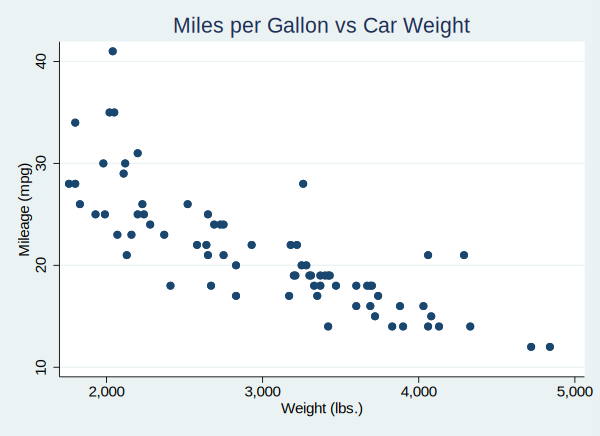

In [13]:
scatter mpg weight, title("Miles per Gallon vs Car Weight")

// Dataset with test scores
*use "https://stats.idre.ucla.edu/stat/stata/notes/hsb2", clear
*scatter read math, title("Reading score vs Math score")
*scatter math science, title("Math score vs Science score")

\
Soll die Abbildung lediglich erstellt, aber nicht angezeigt werden, dann kann als Befehls-Präfix [`quietly`](https://www.stata.com/help.cgi?quietly) verwendet werden.

In [15]:
quietly scatter mpg weight, title("Miles per Gallon vs Car Weight")
graph save mpg-weight, replace
graph export "mpg-weight.png", replace
graph export "mpg-weight.pdf", replace




(note: file mpg-weight.gph not found)
(file mpg-weight.gph saved)

(file mpg-weight.png written in PNG format)

(file mpg-weight.pdf written in PDF format)


## Code kommentieren

`stata_kernel` ermöglicht es, Befehle mit den gängien Zeichen zu kommentieren, d.h. mit `//`, `///`, `*`, and `/*`-`*/`.

In [16]:
* comment
display "comment"
// display "comment"

displayed


In [7]:
display "line continuation " /// comment
    "comment"

line continuation comment


In [8]:
* display "not displayed"

In [17]:
display "displayed1"
/*
display 
"displayed2"
*/
display "displayed3"


displayed1

displayed3


## Autocompletion

`stata_kernel` stellt autocompletion zur Verfügung für locals, globals, Variablen, scalars, and Matrizen basierend auf dem Inhalt des Speichers. Es werden auch Pfade zum Speichern und Laden von Files vogreschlagen. Drücke hierzu <kbd>Tab</kbd> während der Befehlseingabe, um autocompletion zu aktivieren.

![](jupyterlab_autocompletion.png)

## Magics

[_Magics_](https://kylebarron.dev/stata_kernel/using_stata_kernel/magics/) sind spezielle Befehle, die `stata_kernel` für zusätzliche Funktionalität zur Verfügung stellt, insbesondere in Verbindung mit Jupyter. 

Die `Magics`-Bfehle beginnen mit `%`. Du kannst `%help magics` eingeben oder [findest hier](https://kylebarron.dev/stata_kernel/using_stata_kernel/magics/) eine Liste der verfügbaren Magics. Um das Help-File für einen Magics-Befehl zu erhalten, kann `%magic_name --help` verwendet werden.

Die Magics-Befehle **müssem** zu Beginn einer Zelle aufgeführt werden.

### `%head`, `%browse`, `%tail`

**`%head`**, **`%browse`**, und **`%tail`** zeigen einen formatierten Auszug des verwendeten DAtensatzes.

In [25]:
%head 5

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
1,AMC Concord,4099,22,3,2.5,11,2930,186,40,121,3.5799999,Domestic
2,AMC Pacer,4749,17,3,3,11,3350,173,40,258,2.53,Domestic
3,AMC Spirit,3799,22,.,3,12,2640,168,35,121,3.0799999,Domestic
4,Buick Century,4816,20,3,4.5,16,3250,196,40,196,2.9300001,Domestic
5,Buick Electra,7827,15,4,4,20,4080,222,43,350,2.4100001,Domestic


### `%help`
**`%help`** zeigt das Hilfemenü zu einem bestimmten Befehl. Die Links sind klickbar wie in der offiziellen Stata Dokumentation (setzt Internetzugnag voraus), wobei sich das PDF und damit das detaillierte Help-File nicht direkt als PDF öffnen lässt .

In [20]:
%help summarize

This front-end cannot display HTML help.

### `%locals`, `%globals`

**`%locals`** und **`%globals`** zeigen die local oder global macros der aktuellen Sitzung.

In [12]:
local local1 "foo"
local local2 "bar"
local abcd "foo bar"

In [13]:
%locals

abcd:   foo bar
local2: bar
local1: foo


In [14]:
%locals loc

local2: bar
local1: foo


In [15]:
%globals

(note: showing first line of global values; run with --verbose)

T_gm_fix_span:              0
stata_kernel_graph_counter: 2
S_FNDATE:                   17 Jun 2002 08:48
S_FN:                       https://stats.idre.ucla.edu/stat/stata/notes/hsb2.dta
S_ADO:                      BASE;SITE;.;PERSONAL;PLUS;OLDPLACE;`"/Users/kyle/github/stata/stata-kernel/stata_kernel/ado"'
S_level:                    95
F1:                         help advice;
F2:                         describe;
F7:                         save
F8:                         use
S_StataSE:                  SE
S_CONSOLE:                  console
S_FLAVOR:                   Intercooled
S_OS:                       Unix
S_MACH:                     Macintosh (Intel 64-bit)


### `%html`, `%latex`

**`%html`** or **`%latex`** attempt to display either type of _output_ (not user input). This could be used, for example, with `estout` to display several regression results side-by-side.

**Note:** Jupyter can display a math subset of LaTeX but doesn't support tables. _However_, it's really easy to export a Jupyter Notebook file to PDF through LaTeX (see File > Export Notebook As > Export Notebook to PDF). In this PDF export, LaTeX tables _will_ be properly displayed.

In [26]:
cap ssc install estout
sysuse auto, clear
eststo clear
eststo: qui regress price mpg rep78
eststo: qui regress price mpg rep78 gear_ratio trunk
eststo: qui regress price mpg rep78 gear_ratio trunk weight displacement



(1978 Automobile Data)


(est1 stored)

(est2 stored)

(est3 stored)


In [27]:
%html
esttab, label title("Regression Table") html

This front-end or document format cannot display HTML

### `%show_gui`, `%hide_gui`

On Windows, **`%show_gui`** and **`%hide_gui`** show and hide the traditional Stata Graphical User Interface window. These magics do not work on macOS or Linux because those platforms communicate with Stata in a different manner.

In [31]:
%show_gui

## `;`-delimited commands

Often with long commands, such as graphs, using [`#delimit ;`](https://www.stata.com/help.cgi?delimit) helps prevent very long lines and helps to keep code more readable. This is supported in `stata_kernel`, despite it not being allowed in the normal Stata command-line environment.

In [18]:
sysuse auto, clear

(1978 Automobile Data)


In [19]:
#delimit ;
display "Hello, world!";

Hello, world!
delimiter now ;

It's important to note that the `;`-delimiter mode persists across cells. `stata_kernel` will expect cells to include `;` for each command, and will raise an error if `;` is missing.

In [20]:
display "Hello, world!"

stata_kernel error: code entered was incomplete.

This usually means that a loop or program was not correctly terminated.
This can also happen if you are in `#delimit ;` mode and did not end the
command with `;`. Use `%delimit` to see the current delimiter mode and
use `#delimit cr` to switch back to the default mode where `;` is
unnecessary.


You can check the current delimiter with the **`%delimit`** magic.

In [21]:
%delimit

The delimiter is currently: ;


You can switch back to normal line-break delimited commands (i.e. where `;` is unnecessary) with `#delimit cr`.

In [22]:
#delimit cr

delimiter now cr

## Using Mata

You can start an interactive Mata session by typing `mata`. This persists across cells; cells will continue being Mata cells until you run `end` to exit the mata session.

You can run the **`%status`** magic to check if you're in Mata or Stata mode.

In [23]:
sysuse auto, clear

(1978 Automobile Data)


In [24]:
mata

------------------------------------------------- mata (type end to exit) -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [25]:
%status

stata_kernel 1.9.0 for Stata 15.1


	Delimiter:   cr
	Environment: Mata


In [26]:
y    = st_data(., "price")
X    = st_data(., "mpg trunk")
n    = rows(X)
X    = X,J(n,1,1)
XpX  = quadcross(X, X)
XpXi = invsym(XpX)
b    = XpXi*quadcross(X, y)

In [27]:
b'

                  1              2              3
    +----------------------------------------------+
  1 |  -220.1648801    43.55851009    10254.94983  |
    +----------------------------------------------+


In [28]:
end


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [29]:
%status

stata_kernel 1.9.0 for Stata 15.1


	Delimiter:   cr
	Environment: Stata
